## GLASSES: Global optimisation
with Look-Ahead through Stochastic Simulation and Expected-loss Search

This notebooks runs the Emukit code to use the non-myopic Bayesian optimization policy described in the paper [GLASSES: Relieving The Myopia Of Bayesian Optimisation](https://arxiv.org/pdf/1510.06299.pdf) by Javier Gonzalez, Michael Osborne and Neil Lawrence.



In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Load a test function 
from emukit.test_functions import sixhumpcamel_function
f, parameter_space = sixhumpcamel_function()

In [3]:
### --- Generate data
from emukit.experimental_design.model_free.random_design import RandomDesign

design = RandomDesign(parameter_space) # Collect random points
num_data_points = 10
X = design.get_samples(num_data_points)
Y = f(X)

Optimization restart 1/1, f = 12.933549108882463


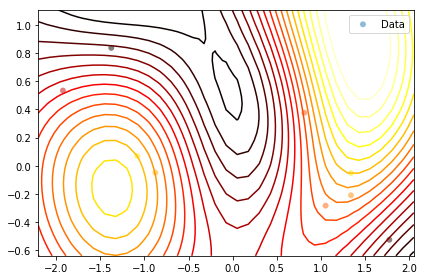

In [4]:
### --- Train a model and wrap it in Emukit. We also visualize the model.
import GPy
from emukit.model_wrappers import GPyModelWrapper

model_gpy_mcmc = GPy.models.GPRegression(X,Y)
model_gpy_mcmc.likelihood.variance.constrain_fixed(0.001)
model_emukit = GPyModelWrapper(model_gpy_mcmc)
model_emukit.optimize()
model_emukit.model.plot()

In [5]:
from emukit.bayesian_optimization.acquisitions import ExpectedLoss, ExpectedImprovement

expected_loss = ExpectedLoss(model = model_emukit)

In [6]:
from glasses import PredictFutureLocationsLocalPenalization

## test to predict how the future locations are computed
## NOTE: locations change when the code is rerun, we need to investigate this

predict_locations = PredictFutureLocationsLocalPenalization(expected_loss, model_emukit, parameter_space, 10)

In [7]:
referece_point = np.array([[1,1]])

predict_locations.compute_next_points(referece_point)

array([[ 1.        ,  1.        ],
       [-1.05453766, -0.08026673],
       [ 1.07990575,  0.10536611],
       [-1.85929926,  0.523383  ],
       [ 1.45964915, -0.3975665 ],
       [ 1.09363355, -0.4941386 ],
       [ 1.6625506 , -0.08047045],
       [-1.51621817,  0.49786736],
       [ 1.68566773,  0.61499759],
       [-1.8262614 ,  0.17757379]])

In [8]:
from glasses import AcquisitionGLASSES

In [9]:
acqu_glasses = AcquisitionGLASSES(model_emukit,parameter_space)

In [10]:
acqu_glasses.evaluate(referece_point)

RuntimeError: Unknown MATLAB location: try to initialize MatlabSession with matlab_root set properly.